üß≠ Shape: (799, 20)
üìã Columns: ['symbol', 'eps', 'pe', 'pbv', 'percentyield', 'marketcap', 'fundamental_group', 'close_price', 'high_price', 'low_price', 'open_price', 'value', 'ema5', 'ema15', 'ema35', 'ema89', 'ema200', 'rsi', 'trend_grade', 'quadrant']
  symbol      eps     pe   pbv  percentyield      marketcap fundamental_group  \
0   PPPM  0.02000   0.00  0.70          0.00  105500.001572                 D   
1   TPCH  0.24112   7.90  0.34         13.91  401575.987864                 A   
2   POLY  0.27632  12.89  2.42          6.38  152320.004272                 A   
3   VCOM  0.21428   7.85  1.48         10.79  303722.809988                 A   
4    NVD -0.00942  38.87  0.32          0.00    4186.000121                 E   

   close_price  high_price  low_price  open_price  value      ema5     ema15  \
0         0.40        0.43       0.39        0.42      0  0.405345  0.413705   
1         2.84        2.90       2.84        2.86      0  2.844297  2.849749   
2         6.

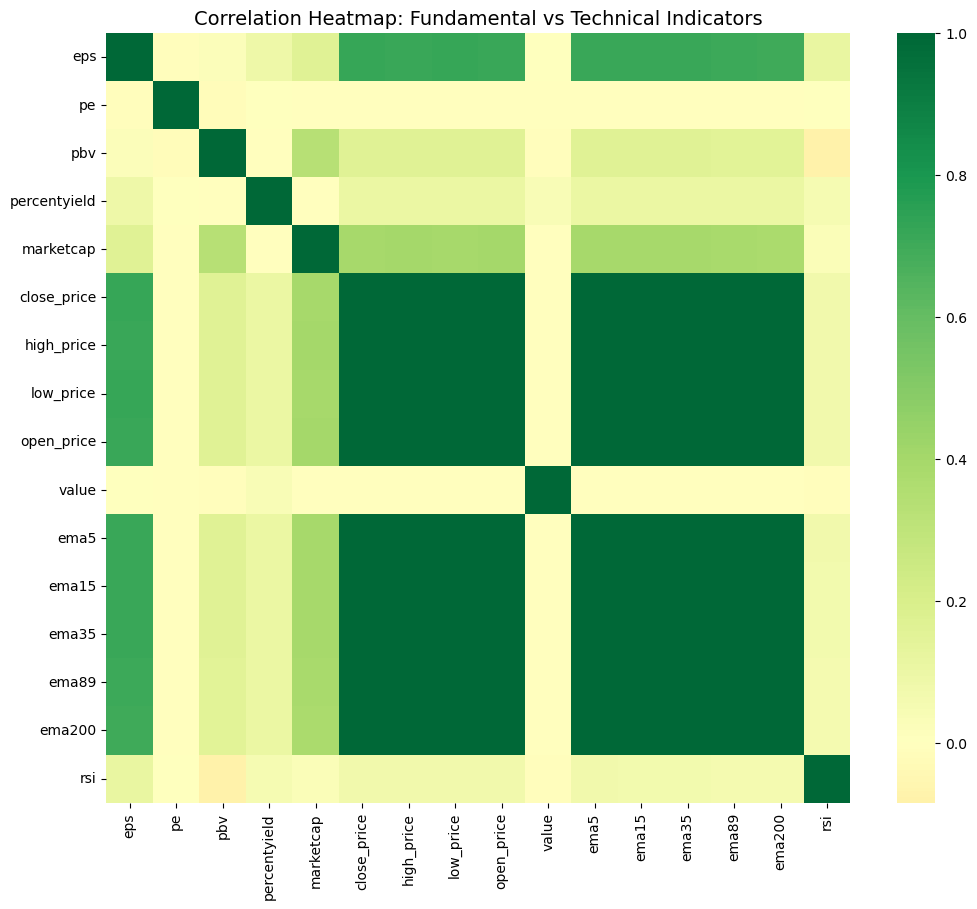


Dark green (~1) ‚Üí Strong positive correlation
Dark red (~‚Äì1) ‚Üí Strong negative correlation
White (~0) ‚Üí Weak or no correlation



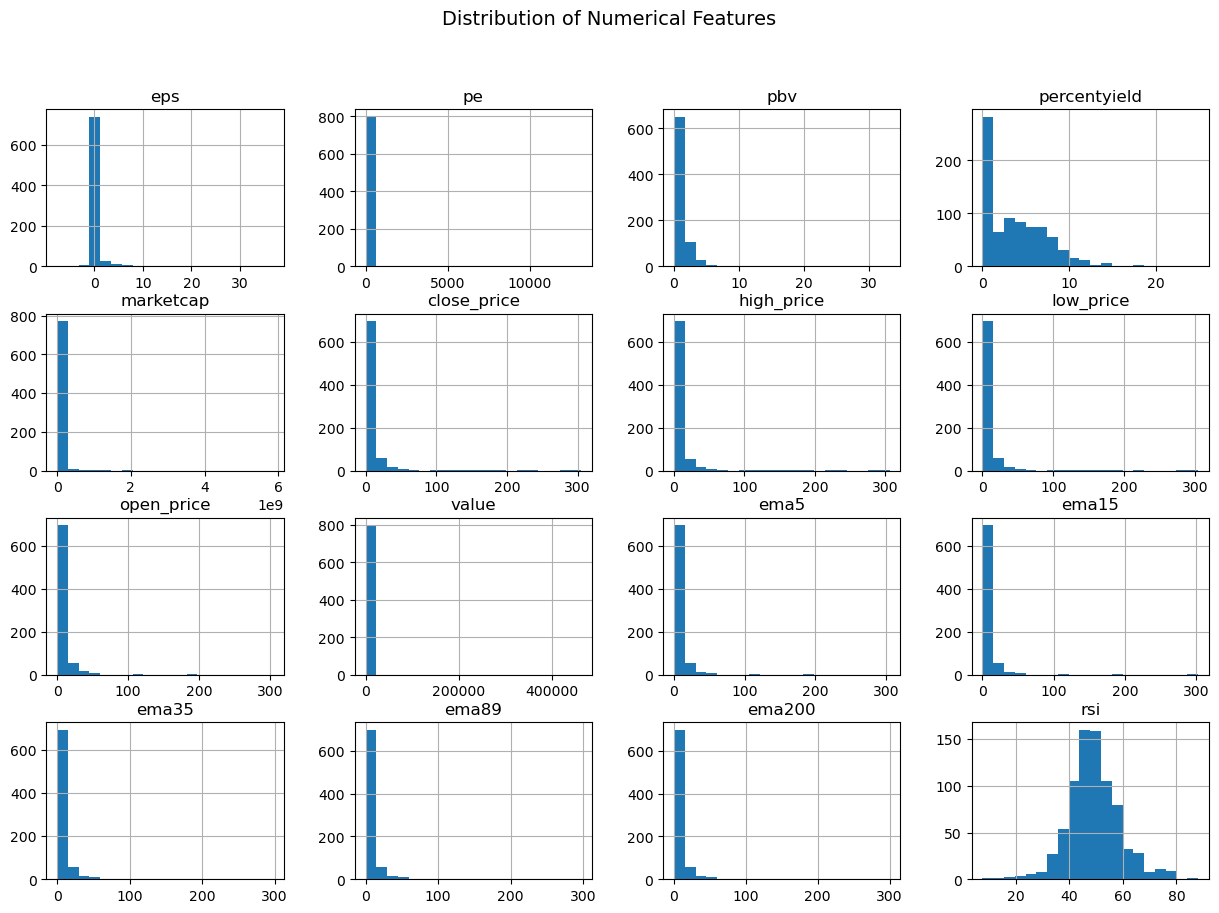

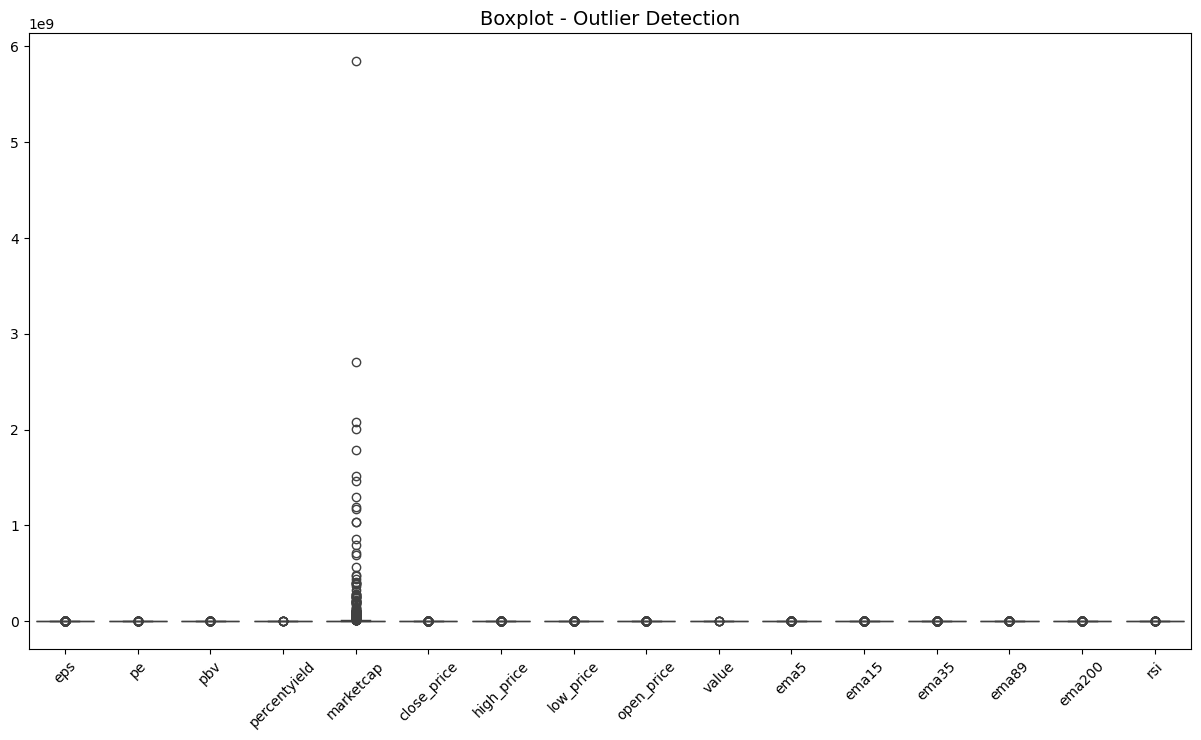

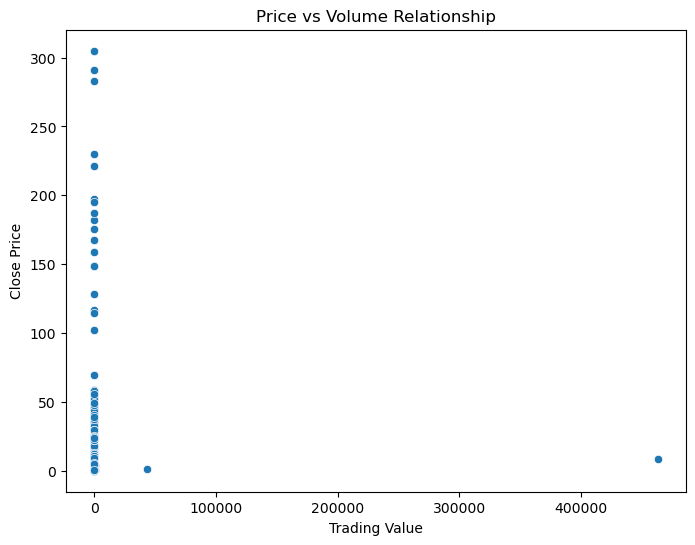

eps ‡∏°‡∏µ Outliers 13 ‡∏à‡∏∏‡∏î
pe ‡∏°‡∏µ Outliers 1 ‡∏à‡∏∏‡∏î
rsi ‡∏°‡∏µ Outliers 7 ‡∏à‡∏∏‡∏î
   rolling_mean_30  volatility_7d  volume_to_mcap
0              NaN            NaN             0.0
1              NaN            NaN             0.0
2              NaN            NaN             0.0
3              NaN            NaN             0.0
4              NaN            NaN             0.0

‚úÖ Descriptive Statistics ‚Üí ‡∏™‡∏≥‡∏£‡∏ß‡∏à‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏û‡∏∑‡πâ‡∏ô‡∏ê‡∏≤‡∏ô‡πÅ‡∏•‡∏∞‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏à‡∏≤‡∏¢
‚úÖ Correlation Analysis ‚Üí ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏±‡∏°‡∏û‡∏±‡∏ô‡∏ò‡πå‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå
‚úÖ Visualization ‚Üí ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡πÅ‡∏ö‡∏ö Histogram / Boxplot / Scatter / Candlestick
‚úÖ Outlier Detection ‚Üí ‡∏à‡∏±‡∏î‡∏Å‡∏≤‡∏£‡∏Ñ‡πà‡∏≤ Outlier ‡∏î‡πâ‡∏ß‡∏¢ Z-score
‚úÖ Feature Engineering ‚Üí ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡πÉ‡∏´‡∏°‡πà: rolling_mean_30, volatility_7d, volume_to_mcap



In [1]:
# ============================================================
# üîç Exploratory Data Analysis (EDA) for Stock Quadrant Project
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import mplfinance as mpf
from scipy import stats

# -----------------------------
# ‚úÖ 1. Load Dataset
# -----------------------------
df = pd.read_excel("stock_all_data.xlsx")

print("üß≠ Shape:", df.shape)
print("üìã Columns:", df.columns.tolist())
print(df.head())

# ============================================================
# ‚úÖ 1. Descriptive Statistics
# ============================================================

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢, ‡∏°‡∏±‡∏ò‡∏¢‡∏ê‡∏≤‡∏ô, ‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î, ‡∏Ñ‡πà‡∏≤‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î ‡πÅ‡∏•‡∏∞ SD
desc = df.describe().T
desc["median"] = df.median(numeric_only=True)
desc["skewness"] = df.skew(numeric_only=True)
desc["kurtosis"] = df.kurtosis(numeric_only=True)
print(desc)

# ============================================================
# ‚úÖ 2. Correlation Analysis
# ============================================================

# ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç
num_cols = df.select_dtypes(include=[np.number])

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì correlation matrix
corr = num_cols.corr()

# üî∏ Heatmap (Seaborn)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="RdYlGn", center=0)
plt.title("Correlation Heatmap: Fundamental vs Technical Indicators", fontsize=14)
plt.show()

# üî∏ Interactive Correlation (Plotly)
fig = px.imshow(
    corr,
    text_auto=".2f",
    color_continuous_scale="RdYlGn",
    title="Interactive Correlation Matrix"
)
fig.show()

# üß© Interpretation
print("""
Dark green (~1) ‚Üí Strong positive correlation
Dark red (~‚Äì1) ‚Üí Strong negative correlation
White (~0) ‚Üí Weak or no correlation
""")

# ============================================================
# ‚úÖ 3. Data Visualization
# ============================================================

# üéØ Histogram Distribution
num_cols.hist(bins=20, figsize=(15,10))
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

# üéØ Boxplot (‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö Outliers)
plt.figure(figsize=(15,8))
sns.boxplot(data=num_cols)
plt.title("Boxplot - Outlier Detection", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# üéØ Scatter Plot: Volume vs Price
if "value" in df.columns and "close_price" in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df["value"], y=df["close_price"])
    plt.title("Price vs Volume Relationship")
    plt.xlabel("Trading Value")
    plt.ylabel("Close Price")
    plt.show()

# üéØ Candlestick Chart (‡πÉ‡∏ä‡πâ‡∏Å‡∏£‡∏ì‡∏µ‡∏°‡∏µ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå: time, open_price, high_price, low_price, close_price)
if all(col in df.columns for col in ["time","open_price","high_price","low_price","close_price"]):
    df_candle = df.copy()
    df_candle["time"] = pd.to_datetime(df_candle["time"])
    df_candle = df_candle.set_index("time")

    mpf.plot(
        df_candle.tail(60),
        type='candle',
        style='yahoo',
        title='Candlestick Chart (Last 60 days)',
        volume=True
    )

# ============================================================
# ‚úÖ 4. Outlier Detection and Cleaning
# ============================================================

# ‡πÉ‡∏ä‡πâ Z-score ‡∏ï‡∏£‡∏ß‡∏à‡∏´‡∏≤‡∏Ñ‡πà‡∏≤ Outlier
cols_check = ["eps", "pe", "rsi"]
for col in cols_check:
    if col in df.columns:
        z = np.abs(stats.zscore(df[col].dropna()))
        outliers = np.where(z > 3)[0]
        print(f"{col} ‡∏°‡∏µ Outliers {len(outliers)} ‡∏à‡∏∏‡∏î")

        # ‡∏Å‡∏≤‡∏£‡∏à‡∏±‡∏î‡∏Å‡∏≤‡∏£ Outlier: Capping ‡∏ó‡∏µ‡πà ¬±3 SD
        mean, std = df[col].mean(), df[col].std()
        df[col] = np.clip(df[col], mean - 3*std, mean + 3*std)

# ‡∏•‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ã‡πâ‡∏≥‡πÅ‡∏•‡∏∞‡∏à‡∏±‡∏î‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡πÄ‡∏ß‡∏•‡∏≤
if "time" in df.columns:
    df["time"] = pd.to_datetime(df["time"])
df = df.drop_duplicates()

# ============================================================
# ‚úÖ 5. Feature Engineering (from EDA Findings)
# ============================================================

# üîπ Rolling Mean (30-day Moving Average)
if "close_price" in df.columns:
    df["rolling_mean_30"] = df["close_price"].rolling(window=30).mean()

# üîπ Volatility Indicator (‡∏Ñ‡πà‡∏≤ std ‡∏Ç‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡∏£‡∏≤‡∏¢‡∏ß‡∏±‡∏ô)
if "close_price" in df.columns:
    df["daily_return"] = df["close_price"].pct_change()
    df["volatility_7d"] = df["daily_return"].rolling(window=7).std()

# üîπ Volume-to-MarketCap Ratio
if "marketcap" in df.columns and "value" in df.columns:
    df["volume_to_mcap"] = df["value"] / df["marketcap"]

# ‡πÅ‡∏™‡∏î‡∏á‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡πÉ‡∏´‡∏°‡πà
print(df[["rolling_mean_30","volatility_7d","volume_to_mcap"]].head())

# ============================================================
# ‚úÖ Summary
# ============================================================
print("""
‚úÖ Descriptive Statistics ‚Üí ‡∏™‡∏≥‡∏£‡∏ß‡∏à‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏û‡∏∑‡πâ‡∏ô‡∏ê‡∏≤‡∏ô‡πÅ‡∏•‡∏∞‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏à‡∏≤‡∏¢
‚úÖ Correlation Analysis ‚Üí ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏±‡∏°‡∏û‡∏±‡∏ô‡∏ò‡πå‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå
‚úÖ Visualization ‚Üí ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡πÅ‡∏ö‡∏ö Histogram / Boxplot / Scatter / Candlestick
‚úÖ Outlier Detection ‚Üí ‡∏à‡∏±‡∏î‡∏Å‡∏≤‡∏£‡∏Ñ‡πà‡∏≤ Outlier ‡∏î‡πâ‡∏ß‡∏¢ Z-score
‚úÖ Feature Engineering ‚Üí ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡πÉ‡∏´‡∏°‡πà: rolling_mean_30, volatility_7d, volume_to_mcap
""")
